In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.model_selection import train_test_split
import os 
import glob
from tensorflow.keras.utils import plot_model

In [2]:
data=pd.read_csv('datasets/Houses Dataset/HousesInfo.txt',header=None,sep=' ',names=['bedrooms','bathrooms','area','zipcode','price'])

In [3]:
data

,bedrooms,bathrooms,area,zipcode,price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


In [4]:
data.index.values+1

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [5]:
sorted(list(glob.glob(os.path.sep.join(['datasets/Houses Dataset', "{}_*".format(1)]))))

['datasets/Houses Dataset\\1_bathroom.jpg',
 'datasets/Houses Dataset\\1_bedroom.jpg',
 'datasets/Houses Dataset\\1_frontal.jpg',
 'datasets/Houses Dataset\\1_kitchen.jpg']

In [6]:
basepath=os.path.sep.join(['datasets/Houses Dataset',"{}_*".format(1)])
imgpaths=sorted(list(glob.glob(basepath)))
inputImages=[]
for imgpaths in imgpaths:
    image=cv2.resize(cv2.imread(imgpaths),(32,32))
    inputImages.append(image)
np.shape(inputImages)

(4, 32, 32, 3)

In [7]:
images=[]
for i in data.index.values:
    basepath=os.path.sep.join(['datasets/Houses Dataset',"{}_*".format(i+1)])
    imgpaths=sorted(list(glob.glob(basepath)))
    inputImages=[]
    for imgpaths in imgpaths: 
        image=cv2.resize(cv2.imread(imgpaths),(32,32))
        inputImages.append(image)
    outputImage=np.zeros((64,64,3),dtype='uint8')
    outputImage[0:32,0:32]=inputImages[0]
    outputImage[0:32,32:64]=inputImages[1]
    outputImage[32:64,32:64]=inputImages[2]
    outputImage[32:64,0:32]=inputImages[3]
    images.append(outputImage)
    
 


In [8]:
images=np.array(images)
images.shape

(535, 64, 64, 3)

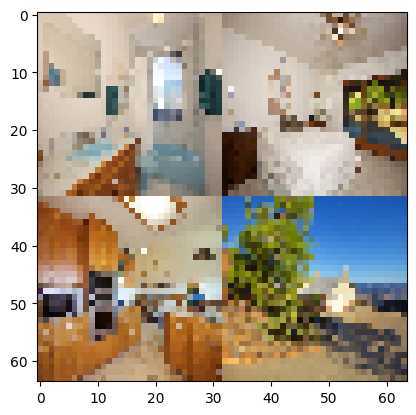

In [9]:
plt.imshow(images[120][...,::-1])

In [10]:
X_train,X_test,IX_train,IX_test=train_test_split(data,images,random_state=523)

Normalization

In [11]:
maxPrice=X_train['price'].max()
Y_train=X_train['price']/maxPrice
y_test=X_test['price']/maxPrice

In [12]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate,Input,Conv2D,MaxPool2D,Activation,Dense,Flatten,Dropout,BatchNormalization

In [13]:
input1=Input(shape=(64, 64, 3))
conv1=Conv2D(16,(3,3),padding='same',activation='relu')(input1)
bachtnorm1=BatchNormalization(axis=-1)(conv1)
maxpool1=MaxPool2D(pool_size=(2,2))(bachtnorm1)
conv2=Conv2D(32,(3,3),padding='same',activation='relu')(maxpool1)
bachtnorm2=BatchNormalization(axis=-1)(conv2)
maxpool2=MaxPool2D(pool_size=(2,2))(bachtnorm2)
conv3=Conv2D(64,(3,3),padding='same',activation='relu')(maxpool2)
bachtnorm3=BatchNormalization(axis=-1)(conv3)
maxpool3=MaxPool2D(pool_size=(2,2))(bachtnorm3)
flatten1=Flatten()(maxpool3)
dense1=Dense(32,activation='relu')(flatten1)
bachtnorm4=BatchNormalization(axis=-1)(dense1)
droupout1=Dropout(0.5)(bachtnorm4)
dense2=Dense(16,activation='relu')(droupout1)




In [14]:
model=Model(input1,dense2)

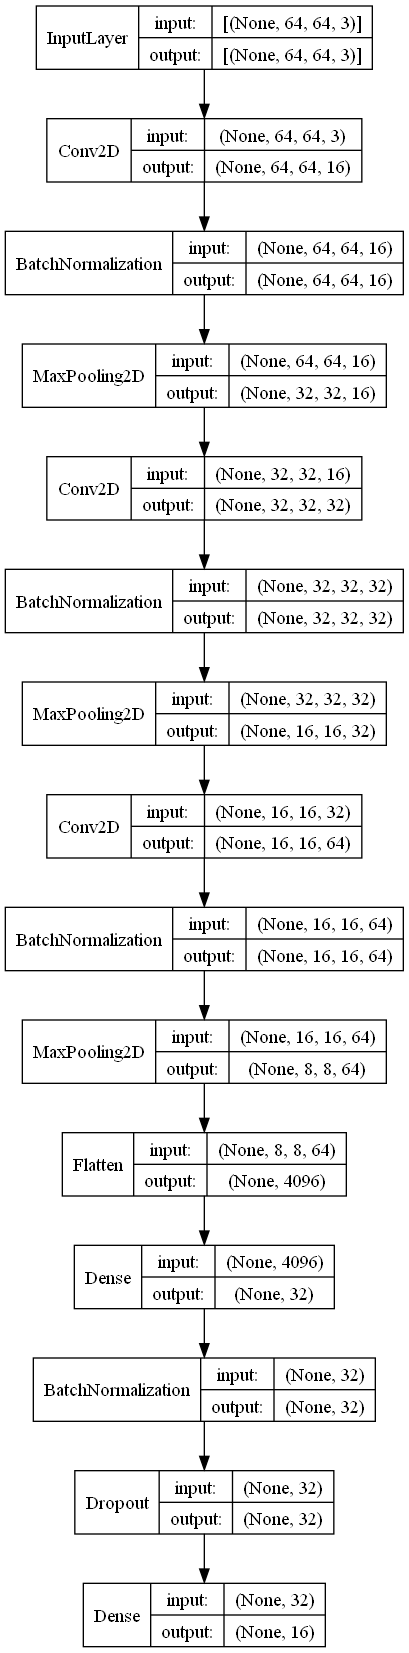

In [15]:
plot_model(model,show_shapes=True,show_layer_names=False)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128   

In [17]:
ss = StandardScaler()
XT = ss.fit_transform(X_train[['bedrooms', 'bathrooms', 'area']])
Xt = ss.transform(X_test[['bedrooms', 'bathrooms', 'area']])


In [18]:
lb = LabelBinarizer()
lb.fit(data['zipcode'])
XTz = lb.transform(X_train['zipcode'])
Xtz = lb.transform(X_test['zipcode'])


In [19]:
XTz[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [20]:
XT = np.hstack([XT, XTz])
Xt = np.hstack([Xt, Xtz])

In [21]:
XT[0]

array([0.51790082, 0.32814078, 0.36211477, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [22]:
XT.shape

(401, 52)

In [23]:
m2=Sequential()
m2.add(Dense(16,activation='relu',input_dim=52))
m2.add(Dropout(0.5))
m2.add(Dense(8,activation='relu'))
m2.add(Dense(4,activation='relu'))

In [24]:
m2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                848       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [25]:
combinemodel=concatenate([m2.output,model.output])

In [26]:
densef1=Dense(8,activation='relu')(combinemodel)
densef2=Dense(1,activation='linear')(densef1)
models=Model(inputs=[m2.input,model.input],outputs=densef2)


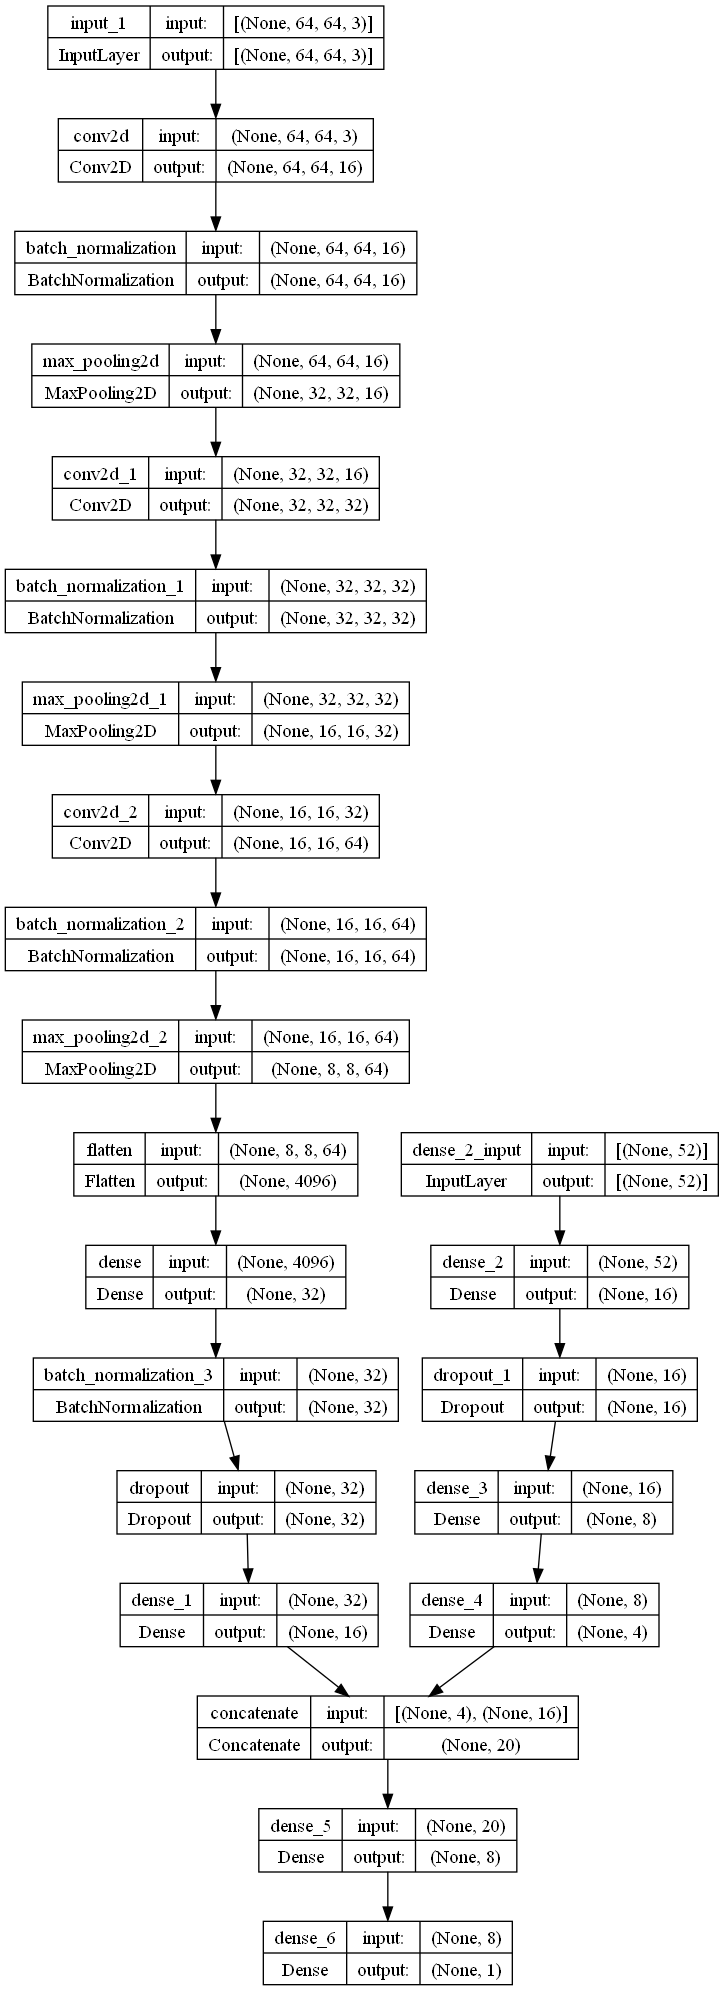

In [27]:
plot_model(models,show_shapes=True)

In [28]:
models.compile(loss='mean_absolute_error',optimizer='adam')

In [29]:
models.fit([XT, IX_train],Y_train,validation_data=([Xt, IX_test], y_test), epochs=100, batch_size=10)

Epoch 1/100
41/41 [==============================] - 6s 74ms/step - loss: 0.3230 - val_loss: 0.6828
Epoch 2/100
41/41 [==============================] - 2s 57ms/step - loss: 0.2447 - val_loss: 0.4148
Epoch 3/100
41/41 [==============================] - 2s 57ms/step - loss: 0.1848 - val_loss: 0.1680
Epoch 4/100
41/41 [==============================] - 3s 67ms/step - loss: 0.1350 - val_loss: 0.1024
Epoch 5/100
41/41 [==============================] - 2s 56ms/step - loss: 0.1203 - val_loss: 0.0861
Epoch 6/100
41/41 [==============================] - 2s 55ms/step - loss: 0.1159 - val_loss: 0.0930
Epoch 7/100
41/41 [==============================] - 2s 57ms/step - loss: 0.1048 - val_loss: 0.0907
Epoch 8/100
41/41 [==============================] - 2s 57ms/step - loss: 0.0961 - val_loss: 0.0842
Epoch 9/100
41/41 [==============================] - 3s 63ms/step - loss: 0.0906 - val_loss: 0.0817
Epoch 10/100
41/41 [==============================] - 3s 66ms/step - loss: 0.0891 - val_loss: 0.0780

In [33]:
predicts = models.predict([Xt, IX_test]) * maxPrice

5/5 [==============================] - 0s 27ms/step


In [34]:
predicts

array([[1048589.7064209 ],
       [ 501691.57981873],
       [ 272243.32094193],
       [ 670147.65739441],
       [ 461845.51715851],
       [ 408703.26757431],
       [ 196712.25547791],
       [ 226142.52567291],
       [ 923896.5511322 ],
       [ 456050.93240738],
       [ 403210.04390717],
       [ 512640.95306396],
       [ 186858.86263847],
       [ 562816.67947769],
       [ 155509.76991653],
       [ 438329.51784134],
       [ 619067.0132637 ],
       [ 357676.08880997],
       [ 705553.05480957],
       [ 139839.29157257],
       [1109580.75523376],
       [1793704.98657227],
       [ 612484.9319458 ],
       [ 479036.24176979],
       [ 953646.06380463],
       [ 246646.55327797],
       [ 631575.10757446],
       [ 519347.07164764],
       [ 508928.23934555],
       [ 166323.54259491],
       [1209845.54290771],
       [ 384463.28043938],
       [ 533610.10551453],
       [ 439552.12831497],
       [ 591549.39651489],
       [ 910500.04959106],
       [ 456737.30969429],
 

In [35]:
predicts.flatten()

array([1048589.7064209 ,  501691.57981873,  272243.32094193,
        670147.65739441,  461845.51715851,  408703.26757431,
        196712.25547791,  226142.52567291,  923896.5511322 ,
        456050.93240738,  403210.04390717,  512640.95306396,
        186858.86263847,  562816.67947769,  155509.76991653,
        438329.51784134,  619067.0132637 ,  357676.08880997,
        705553.05480957,  139839.29157257, 1109580.75523376,
       1793704.98657227,  612484.9319458 ,  479036.24176979,
        953646.06380463,  246646.55327797,  631575.10757446,
        519347.07164764,  508928.23934555,  166323.54259491,
       1209845.54290771,  384463.28043938,  533610.10551453,
        439552.12831497,  591549.39651489,  910500.04959106,
        456737.30969429,  163397.84860611,  700256.70528412,
        482416.98741913,  170507.49063492,  388882.8754425 ,
        304173.23112488,  633827.68630981, 1083728.31344604,
       1239401.10206604,  601483.22582245, 1434689.04495239,
        386340.70754051,

In [38]:
diff=abs(predicts.flatten()-(y_test*maxPrice))

In [39]:
diff

11       9589.706421
81      28108.420181
75      87343.320942
524    100197.657394
436    151945.517159
           ...      
430      4736.869240
92     269694.355965
141      9777.705669
244     24407.494259
486     27282.363176
Name: price, Length: 134, dtype: float64

In [40]:
diff.mean()

191701.51681149896

In [41]:
data['price'].mean()

589362.8112149533

In [42]:
data['price'].std()

509026.06764905667

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error

In [44]:
r2_score(y_pred=predicts.flatten(), y_true=(y_test * maxPrice))

0.32546081683972117

In [45]:
abs(models.predict([Xt, IX_test]).flatten() - y_test).mean() * maxPrice

5/5 [==============================] - 0s 30ms/step


191701.51681149896

In [46]:
mea=mean_absolute_error(y_pred=predicts.flatten(), y_true=(y_test * maxPrice))

In [47]:
mea

191701.51681149896